
# <i>Okay, so you're Brad Pitt:</i><br><br><center>An Analysis of Movie Revenues based on Actors and Movie Genres</center>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

As English-American actor Bob Hope put it,

> <i>Celebrities have a way of touching our lives. Perhaps we are influenced by their screen image, or perhaps by their acquired status [...]</i> 

<p style='text-align: justify'>
Celebrities have a certain charm, some more than others, which makes us want to watch them. In the context of movies, this can - but not necessarily - translate to higher revenues for films and the companies that produced them. This "charm" aspect of actors and its effect on the marketability and financial success of movies has been the topic in academic literature for many years.

The empirical analysis undertaken in this project aims to contribute to this discussion by examining the TMDB dataset containing data on movies from 1960 to 2017. In particular, this analysis aims to find out if a correlation exists between (top) stars and movie revenues. Another goal of this project is to show (or attempt to show) if an interplay between the actors, genres, and the invested budget correlates with the commercial success of movies.
</p>
<br>


In [1]:
# Import packages for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

To start the analysis, the TMDB dataset needs to be loaded in a Pandas dataframe on which cleaning methods will be applied.

### General Properties

In [2]:
# load the dataset in a dataframe and show the first five rows

main_df = pd.read_csv(r"tmdb-movies.csv", header = 0, index_col = 'id' )
main_df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Show the number of rows and columns in the dataframa
main_df.shape

(10866, 20)

The dataset contains **10866** rows with **20** columns. The dataset was loaded with the column $\mathit{id}$ as the index.

In [4]:
# Show the data types of each column
main_df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We see here that the there are a lot of columns (11, to be exact) which are of type $\mathit{object}$. These are mostly text (string) fields about the movies in our dataset. It is important to know these fields as data manipulation largely relies on the data type.

In [5]:
# Show string fields of the dataframe
main_df.select_dtypes(include = 'object').head()

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
id,,,,,,,,,,,
135397,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15
76341,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15
262500,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15
140607,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15
168259,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15


As stated in this <a href='https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf'>document</a>, some columns contain multiple values which are separated by delimiters. This can be observed in the columnds *cast*, *genres*, *production_companies*, and *keywords*. As the focus of this analysis is on actors and genres, the values in these columns need to be separated.
<br><br>
It can also be observed that the dataframe has two id columns: *id* and *imdb_id*. The former (*id*) was used as an index column when the dataset was loaded as a dataframe. It does not make sense here to have two id columns. Dropping the *imdb_id* column would be an obvious solution here.
Furthermore &mdash; at least for the purposes of this analysis &mdash; the columns *homepage* , *overview*, *tagline*, and *keywords* are not necessary. A movie with a website could potentially attract more movie goers, especially in this social media age, and a catchy tagline sticks. Both of these could translate to higher revenues but will not be the focus of this analysis.

In [6]:
# show summary statistics for numerical columns
main_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As already mentioned, the data cleaning techniques vary based on the data type. The *budget* and *revenue* columns (and the columns with the adjusted values) have a minimum of zero which looks very anomalous. Movies cannot have zero budgets nor zero revenue and these missing values accordingly need to be imputed. The *budget* and *revenue* will obviously have direct positive correlations with the *budjet_adj* and *revenue_adj* columns since the adjusted value columns were created from the former. For ease of comparison, only the adjusted columns will be used in this analysis. 

Furthermore, the adjusted columns are of type $\textit{float64}$ as shown above. 

In [7]:
# Show zero values in budget_adj and revenue_adj fields
main_df[(main_df['budget_adj'] == 0) | (main_df['revenue_adj'] == 0)].shape[0]

7011

There are **7011** entries in which the *budget_adj* or the *revenue_adj* column contains a zero value. Dropping these rows would not be wise as it accounts for more than half of the dataset. Imputing such a huge chunk of the dataset with one value (e.g. mean) might also not yield a sound statistical analysis. A strategy to replace the zero values intuitively will be needed for this analysis.

In [8]:
# Show duplicates
main_df[main_df.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


There is **one** duplicate entry which needs to be removed in the dataset.


### Data Cleaning

For data cleaning purposes in this analysis, the following have to be done:

<ul>
    <li>Remove the <i>imdb_id</i> column since the column <i>id</i> has already been used as index.</li>
    <li>Remove the columns <i>homepage, overview, tagline, director</i> and <i>keywords</i> as extraneous string fields.</li>
    <li>Remove the superfluous <i>budget</i> and <i>revenue</i> columns and retain the adjusted values (<i>budget_adj</i> and <i>revenue_adj</i>).</li>
    <li>Convert the <i>budget_adj</i> and <i>revenue_adj</i> to integer values.</li>
    <li>Remove the duplicated entry</li>
    <li>Replace the zero values in the <i>budget_adj</i> and <i>revenue_adj</i>.
    <li>Split the values in the <i>actors</i> and <i>genres</i> into different columns.</li>
</ul>

In [9]:
# Remove unnecessary columns
main_df.drop(columns = ['imdb_id', 'homepage', 'overview', 'tagline', 'director', 'keywords'], inplace = True)

In [10]:
# Remove the budget and revenue columns
main_df.drop(columns = ['revenue', 'budget'], inplace = True)

In [11]:
# Convert budget_adj and revenue_adj columns to integer columns
main_df[['budget_adj', 'revenue_adj']] = main_df[['budget_adj', 'revenue_adj']].astype(np.int64)

In [12]:
# Remove the duplicated entry
main_df.drop_duplicates(inplace = True)

In [13]:
# Drop movies without any information on genres and cast
main_df.dropna(subset = ['genres', 'cast'], inplace = True)

As mentioned, there are zero values in the *budget_adj* and *revenue_adj* columns which need to be replaced. Replacing this with one value might not be the best strategy. My initial idea was to model the zero-valued entries as a function of the genres using regression analysis. I decided against this strategy because I would only be training on a dataset with fewer entries as those for which the values should be replaced. To simplify this, I will group the movies by decade and use the mean of the non-zero movies as the value to replace the zeros. 

In [14]:
# Create a decade column for grouping
main_df['decade'] = main_df.apply(lambda row: (row['release_year'] // 10) * 10, axis = 1)

In [15]:
# Create a dictionary with the decades as the keys and the mean per decade as the values
budget_by_decade = main_df.groupby('decade').mean()['budget_adj'].to_dict()
revenue_by_decade = main_df.groupby('decade').mean()['revenue_adj'].to_dict()

In [16]:
# Function to replace zero values using a dictionary

def replace_zeros(row, column, dictionary):
    value = 0
    if row[column] != 0:
        value = row[column]
    else:
        value = dictionary[row['decade']]
    return value

In [17]:
# Replace zero budget values using helper function

main_df['budget_adj'] = main_df.apply(lambda row: replace_zeros(row, 'budget_adj', budget_by_decade), axis = 1)

In [18]:
# Replace zero revenue values using helper function and convert budget and revenue columns to integers

main_df['revenue_adj'] = main_df.apply(lambda row: int(replace_zeros(row, 'revenue_adj', revenue_by_decade)), axis = 1)
main_df[['budget_adj', 'revenue_adj']] = main_df[['budget_adj', 'revenue_adj']].astype(np.int64) 

In [19]:
main_df[['budget_adj', 'revenue_adj']].describe()

,budget_adj,revenue_adj
count,1.076700e+04,1.076700e+04
mean,2.664382e+07,8.000064e+07
std,3.089523e+07,1.374471e+08
min,1.000000e+00,2.000000e+00
25%,1.269530e+07,3.900878e+07
50%,1.818392e+07,5.207407e+07
75%,2.382025e+07,6.444325e+07
max,4.250000e+08,2.827124e+09


In [20]:

genres = main_df['genres'].str.get_dummies(sep = '|fdf')
#main_df = pd.concat([main_df, genres], axis = 1)

In [24]:
budget_q1 = main_df['budget_adj'].quantile(0.25)
budget_q3 = main_df['budget_adj'].quantile(0.75)
budget_iqr = budget_q3 - budget_q1

In [25]:
revenue_q1 = main_df['revenue_adj'].quantile(0.25)
revenue_q3 = main_df['revenue_adj'].quantile(0.75)
revenue_iqr = revenue_q3 - revenue_q1

In [28]:
main_df[~(main_df['budget_adj'] < budget_q1 - 1.5 * budget_iqr) | ~(main_df['budget_adj'] > budget_q3 + 1.5 * budget_iqr)]

,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
id,,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892,2010
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,2010
262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025,2010
140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,2010
168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923,1385748801,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,10933763,57076685,1960
20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,10933763,57076685,1960
39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,10933763,57076685,1960


In [32]:
from scipy import stats

new_df = main_df[np.abs(stats.zscore(main_df['budget_adj'])) < 2]

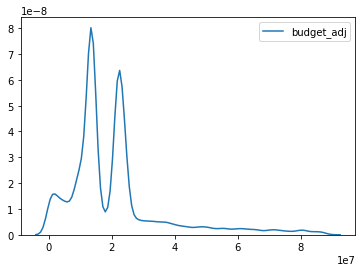

In [34]:
sns.kdeplot(new_df['budget_adj'])

In [44]:
wer = pd.DataFrame(main_df.groupby('decade')['budget_adj'].mean())


In [47]:
wer.budget_adj = wer.budget_adj.astype(np.int64)

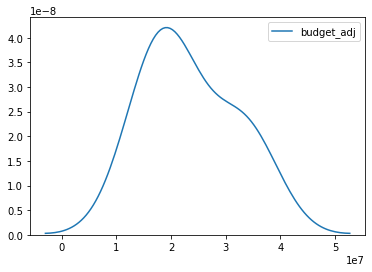

In [50]:
wer.describe()
sns.kdeplot(wer['budget_adj'])

In [51]:
main_df[pd.isna(main_df['release_year'])]

,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
id,,,,,,,,,,,,,


In [52]:
from datetime import datetime

def format_date(datestr, year):
    datestr = datestr.split('/')
    formatted_date = datetime(year, int(datestr[0]), int(datestr[1]))
    return formatted_date

main_df['formatted_date'] = main_df.apply(lambda row: format_date(row['release_date'], row['release_year']), axis = 1)

In [53]:
main_df.formatted_date

id
135397   2015-06-09
76341    2015-05-13
262500   2015-03-18
140607   2015-12-15
168259   2015-04-01
            ...    
21       1966-06-15
20379    1966-12-21
39768    1966-01-01
21449    1966-11-02
22293    1966-11-15
Name: formatted_date, Length: 10767, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Replace this header name!)

In [21]:
main_df

,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
id,,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892,2010
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,2010
262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025,2010
140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,2010
168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923,1385748801,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,10933763,57076685,1960
20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,10933763,57076685,1960
39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,10933763,57076685,1960


In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

